In [1]:
import dataclasses

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
@dataclasses.dataclass
class Data:
    train: pd.DataFrame
    test: pd.DataFrame

In [3]:
FILES = ('discounts_train.parq.gzip', 'discounts_test.parq.gzip')

sns.set_style("darkgrid")
pd.options.display.max_columns = 100

In [5]:
data = Data(
    train=pd.read_parquet(FILES[0]),
    test=pd.read_parquet(FILES[1])
)

In [6]:
data.train.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,spend_5m_clothes,spend_6m_clothes,spend_1m_health,spend_2m_health,spend_3m_health,spend_4m_health,spend_5m_health,spend_6m_health,spend_1m_pet,spend_2m_pet,spend_3m_pet,spend_4m_pet,spend_5m_pet,spend_6m_pet,spend_1m_groceries,spend_2m_groceries,spend_3m_groceries,spend_4m_groceries,spend_5m_groceries,spend_6m_groceries,spend_1m_eletronic,spend_2m_eletronic,spend_3m_eletronic,spend_4m_eletronic,spend_5m_eletronic,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure,sales_prediction_bins,sales_prediction
0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,45,15,30.0,55.0,10.0,160.0,0,0,0,0.0,0.0,0.0,3368.64,125.0,40.06,40,1.0,MA,6,8,1351.024765
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,10.0,0.0,0,0,0,0.0,0.0,0.0,2133.10,75.0,29.52,36,0.0,MG,10,4,1035.580387
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,25,30,35.0,0.0,20.0,50.0,0,0,0,0.0,0.0,0.0,2001.62,50.0,48.08,34,0.0,RJ,7,3,992.401825
3,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,55,135,120.0,10.0,40.0,130.0,0,0,0,0.0,0.0,0.0,1461.96,10.0,61.64,31,0.0,BA,7,1,919.720735
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,25,0,10.0,95.0,25.0,20.0,0,0,0,0.0,0.0,0.0,2743.72,100.0,34.44,32,1.0,PB,6,6,1176.485681


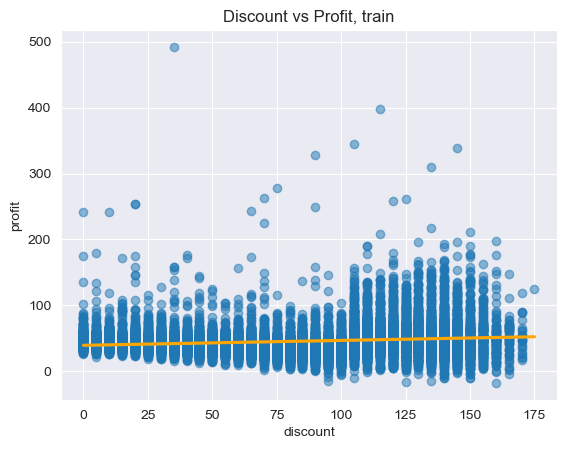

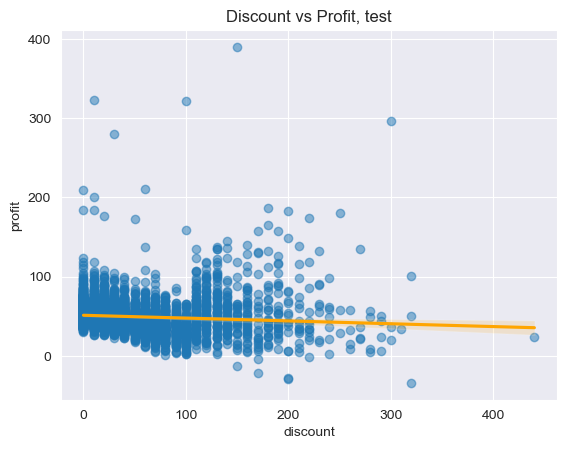

In [7]:
for field in dataclasses.fields(data):
    sns.regplot(
        x='discount', y='profit', data=getattr(data, field.name),
        scatter_kws={"alpha":0.5}, line_kws={'color': 'orange'}
    )
    plt.title(f'Discount vs Profit, {field.name}')
    plt.show()

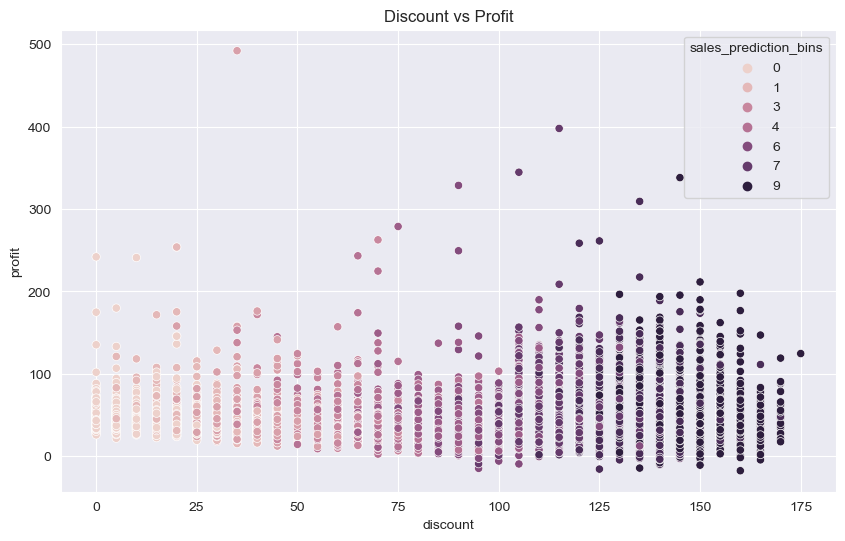

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(
    x='discount', y='profit', data=data.train, hue='sales_prediction_bins', ax=ax
)
plt.title(f'Discount vs Profit')
plt.show()